In [2]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import scipy.stats as sts
import numpy as np

amplification_DF = pd.read_csv('amplification_DF_division.csv')
n_boots = 1000

Why some units show both amplification and quenching and some just quenching. Based on eye balling the data, it seemed that units with high baseline fano-factor show quenching. Let's quantify that at the population. The analyses below show that indeed, units that show only quenching, have on average higher baseline variability.

Mean and SEM of bsl for each layer and quencher / mixer type:
layer  qtype_signi
G      mixer          1.767429
       quencher       1.645983
IG     mixer          1.646851
       quencher       2.816324
SG     mixer          2.304302
       quencher       4.703462
Name: bsl, dtype: float64
layer  qtype_signi
G      mixer          0.191045
       quencher       0.143494
IG     mixer          0.138462
       quencher       0.404018
SG     mixer          0.286886
       quencher       0.391942
Name: bsl, dtype: float64
                  df     sum_sq    mean_sq          F        PR(>F)
C(qtype_signi)   1.0  43.084671  43.084671  35.488405  6.987013e-08
C(layer)         2.0  28.663561  14.331780  11.804941  3.320377e-05
Residual        78.0  94.695841   1.214049        NaN           NaN

Baseline difference between quencher and mixer in SG:
Ttest_indResult(statistic=-5.035096947885139, pvalue=2.300840001154506e-05)

Baseline difference between quencher and mixer in G:
Ttest_indResult(sta

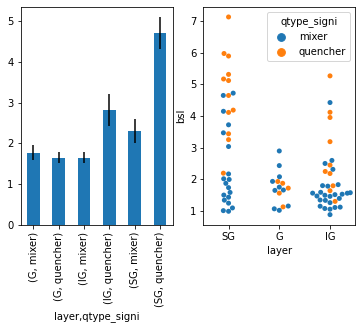

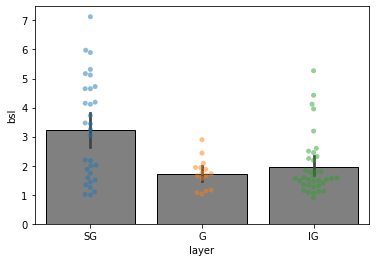

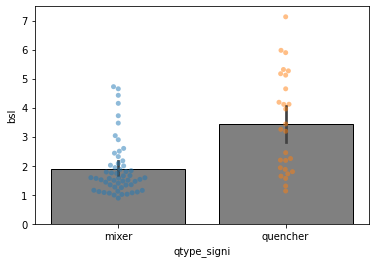

In [20]:
ax = plt.subplot(1,2,1)
SEM = amplification_DF.groupby(['layer','qtype_signi'])['bsl'].sem()
amplification_DF.groupby(['layer','qtype_signi'])['bsl'].mean().plot(kind='bar',yerr=SEM,ax=ax)

ax = plt.subplot(1,2,2)
sns.swarmplot(x='layer',y='bsl',data=amplification_DF,hue='qtype_signi',ax=ax)

plt.figure()
sns.barplot(y='bsl',x='layer',data=amplification_DF,fc='gray',ec='black')
sns.swarmplot(y='bsl',x='layer',data=amplification_DF,alpha=0.5)

plt.figure()
sns.barplot(y='bsl',x='qtype_signi',data=amplification_DF,fc='gray',ec='black')
sns.swarmplot(y='bsl',x='qtype_signi',data=amplification_DF,alpha=0.5)

print('Mean and SEM of bsl for each layer and quencher / mixer type:')
print(amplification_DF.groupby(['layer','qtype_signi'])['bsl'].mean())
print(amplification_DF.groupby(['layer','qtype_signi'])['bsl'].sem())

lm = ols('bsl ~ C(qtype_signi) + C(layer)',data=amplification_DF).fit()
table = sm.stats.anova_lm(lm,typ=1)
print(table)

SG = amplification_DF[amplification_DF['layer']=='SG']
G = amplification_DF[amplification_DF['layer']=='G']
IG = amplification_DF[amplification_DF['layer']=='IG']

print('\nBaseline difference between quencher and mixer in SG:')
#------------------------------------------------------------------------------
mixer = SG.query('qtype_signi=="mixer"')['bsl']
quencher = SG.query('qtype_signi=="quencher"')['bsl']
print(sts.ttest_ind(mixer,quencher,nan_policy='omit'))

print('\nBaseline difference between quencher and mixer in G:')
#------------------------------------------------------------------------------
mixer = G.query('qtype_signi=="mixer"')['bsl']
quencher = G.query('qtype_signi=="quencher"')['bsl']
print(sts.ttest_ind(mixer,quencher,nan_policy='omit'))

print('\nBaseline difference between quencher and mixer in IG:')
#------------------------------------------------------------------------------
mixer = IG.query('qtype_signi=="mixer"')['bsl']
quencher = IG.query('qtype_signi=="quencher"')['bsl']
print(sts.ttest_ind(mixer,quencher,nan_policy='omit'))

print('\nBaseline difference between quencher and mixer across layers:')
#------------------------------------------------------------------------------
mixer = amplification_DF.query('qtype_signi=="mixer"')['bsl']
quencher = amplification_DF.query('qtype_signi=="quencher"')['bsl']
print(sts.ttest_ind(mixer,quencher,nan_policy='omit'))
print('Mixer:',mixer.mean(),'+-',mixer.sem(),'Quencher:',quencher.mean(),'+-',quencher.sem())

print('\nBaseline difference between layers:')
#------------------------------------------------------------------------------
print('SG:',SG['bsl'].mean(),'+-',SG['bsl'].sem(),'\n','G:',G['bsl'].mean(),'+-',G['bsl'].sem(),'\nIG:',IG['bsl'].mean(),'+-',IG['bsl'].sem())